In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
import pandas as pd
from typing import Dict, List

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))



In [ ]:
# Load all results
results_dir = Path("../results_losses_moon")
loss_names = ['trace_distance', 'inner_loss']
data = {loss: [] for loss in loss_names}

for loss_name in loss_names:
    pattern = f"tqfm_{loss_name}_depth2_*.pkl"
    files = sorted(results_dir.glob(pattern))
    print(f"{loss_name}: {len(files)} runs found")
    
    for file in files:
        try:
            with open(file, 'rb') as f:
                data[loss_name].append(pickle.load(f))
        except Exception as e:
            print(f"  Warning: Failed to load {file.name}: {e}")

print("\n✓ Data loaded successfully")
for loss_name in loss_names:
    print(f"  {loss_name}: {len(data[loss_name])} runs")
    
num_runs = min(len(data[loss_name]) for loss_name in loss_names)
print(f"\nUsing {num_runs} runs for analysis (minimum across losses)")

trace_distance: 20 runs found
inner_loss: 20 runs found

✓ Data loaded successfully
  trace_distance: 20 runs
  inner_loss: 20 runs

Using 20 runs for analysis (minimum across losses)


## Accuracy

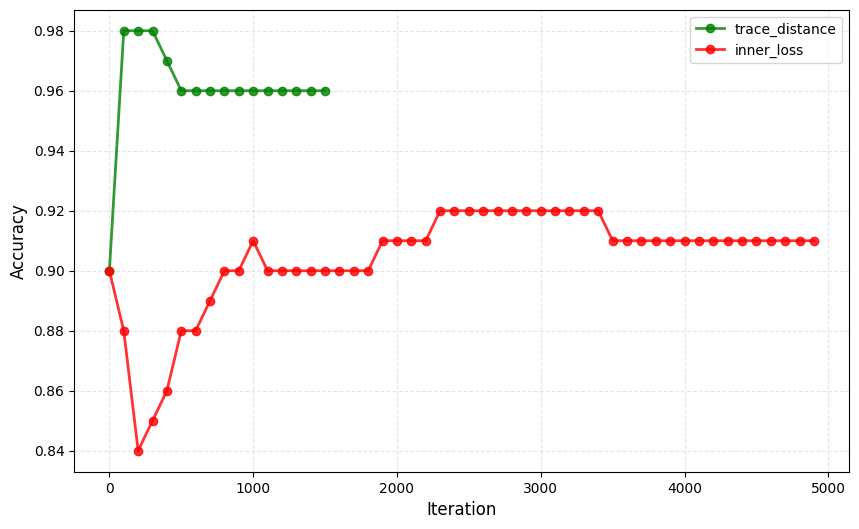

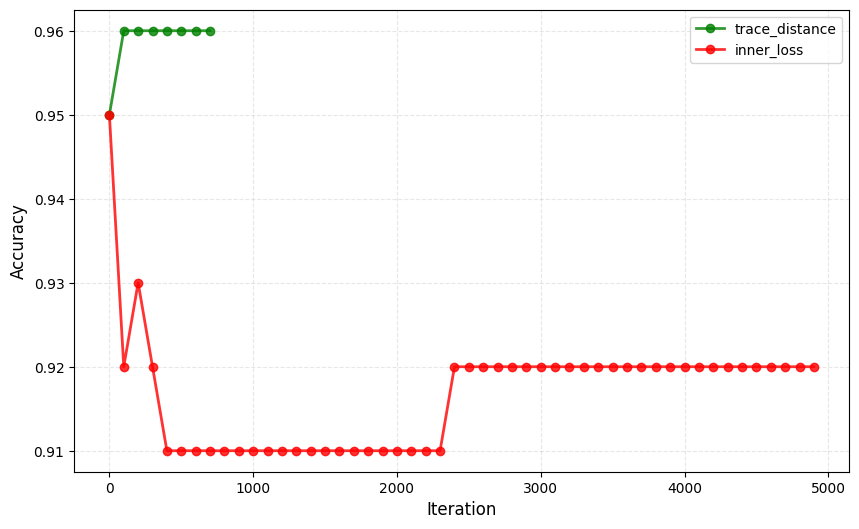

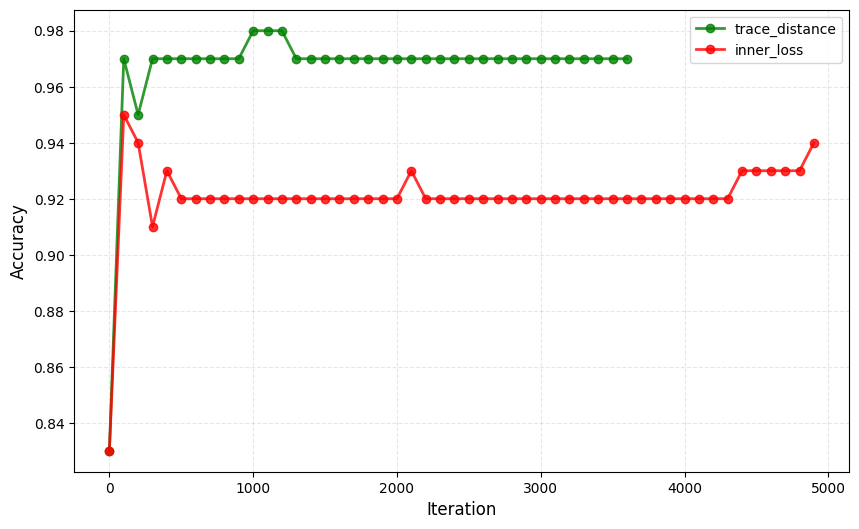

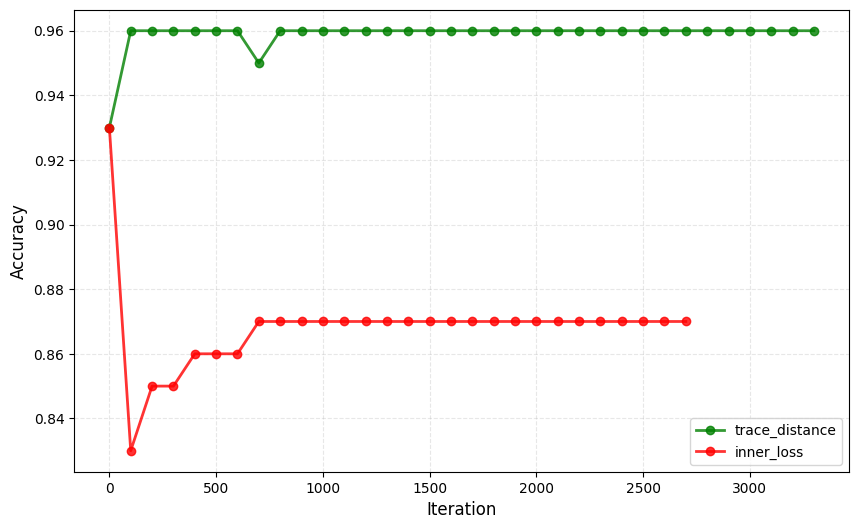

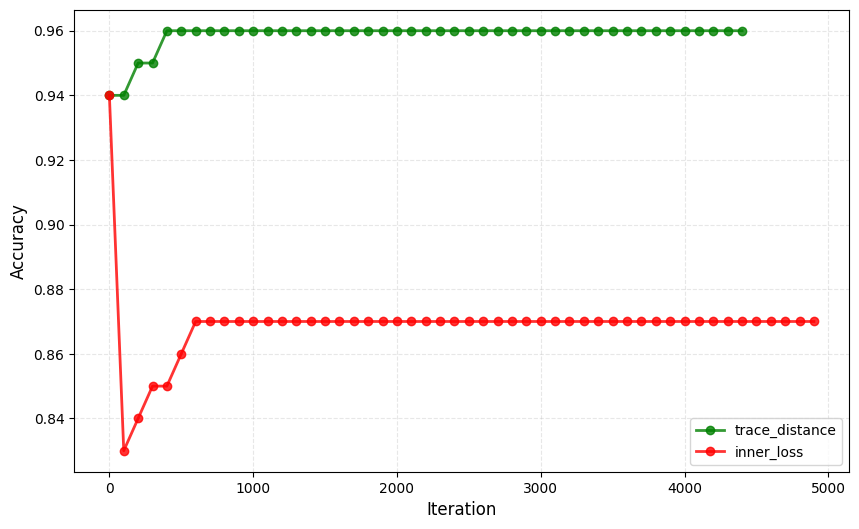

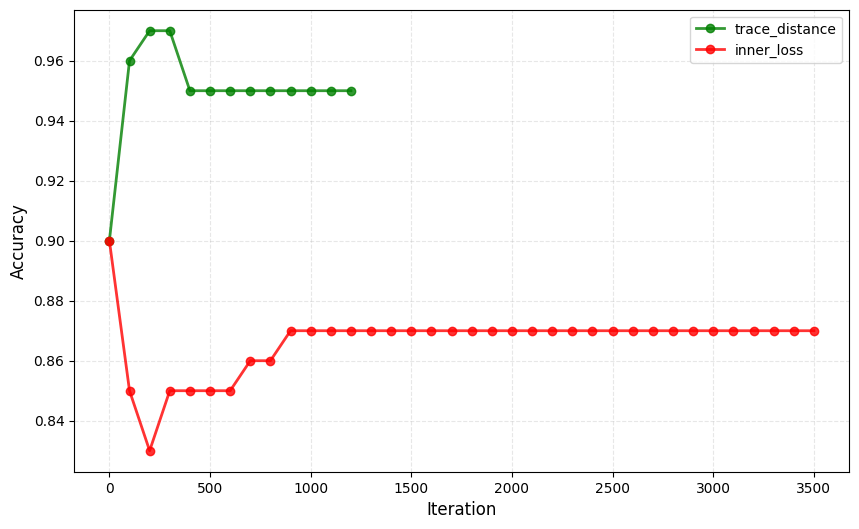

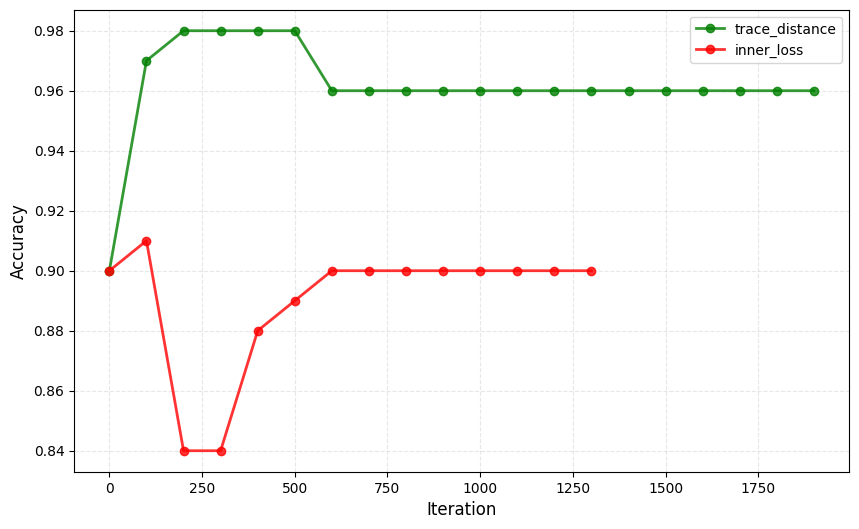

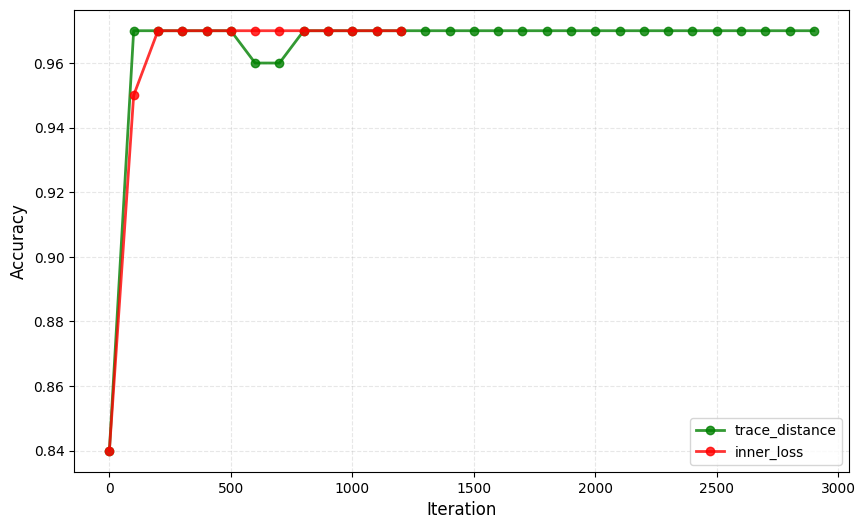

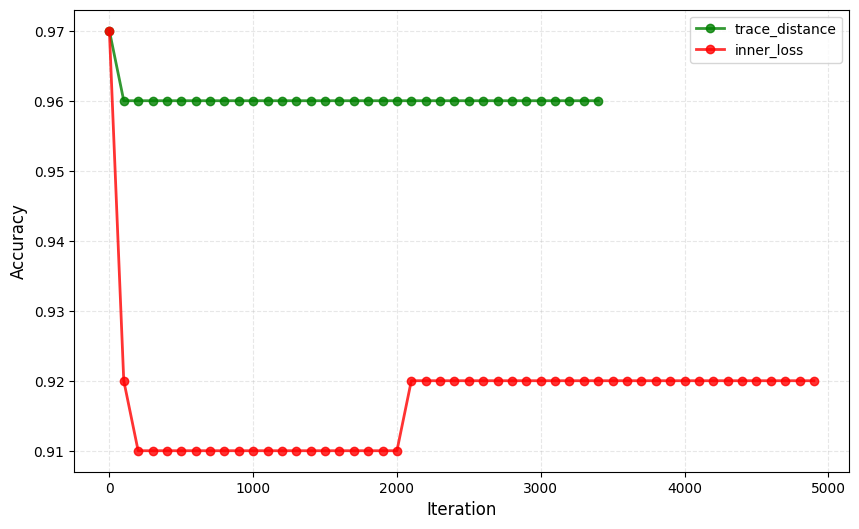

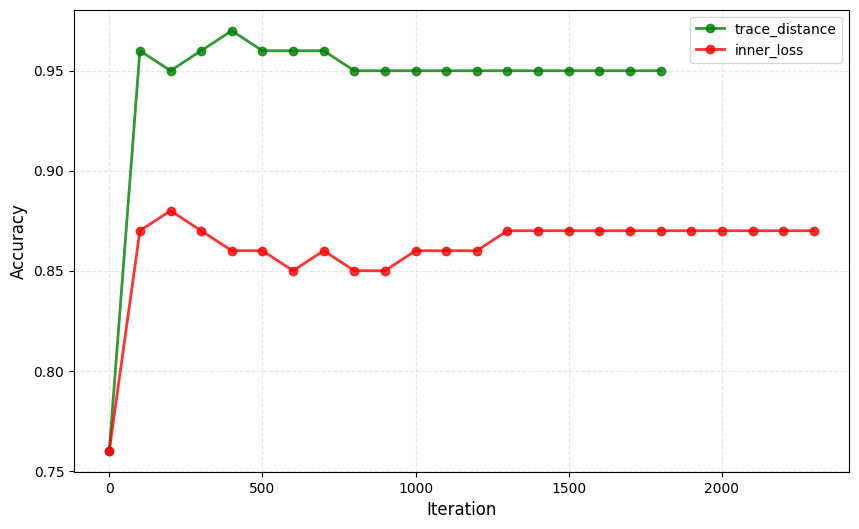

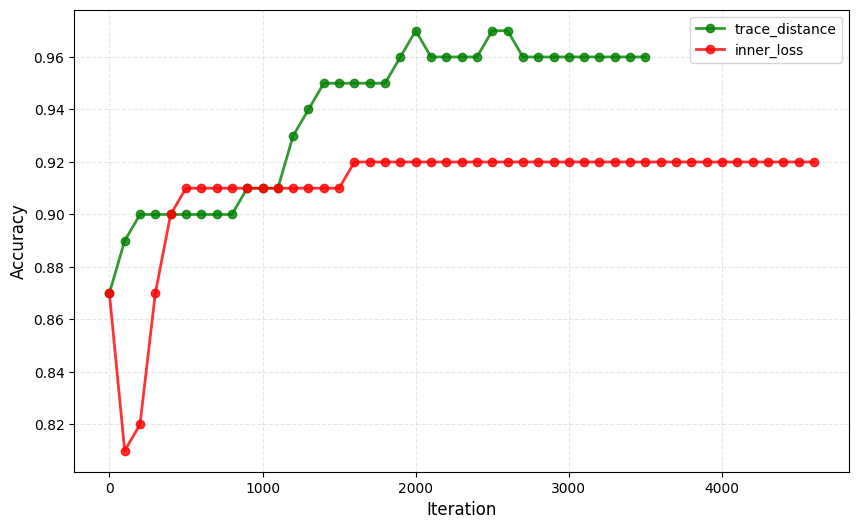

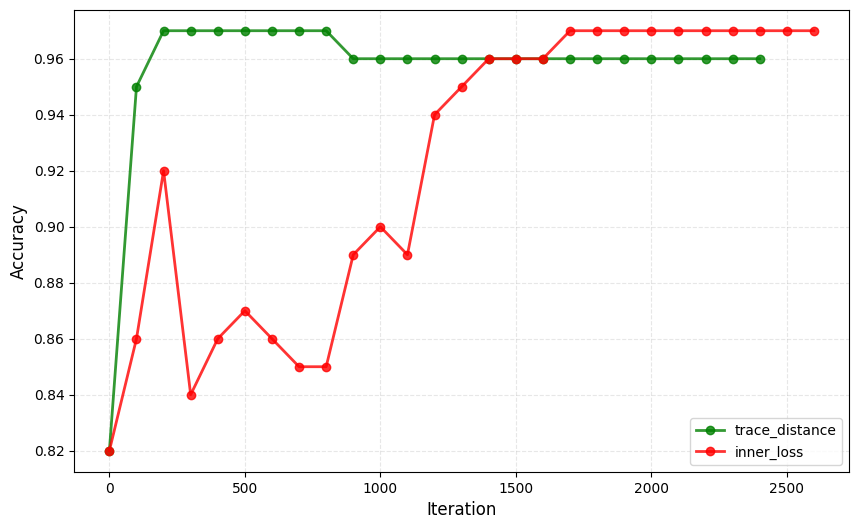

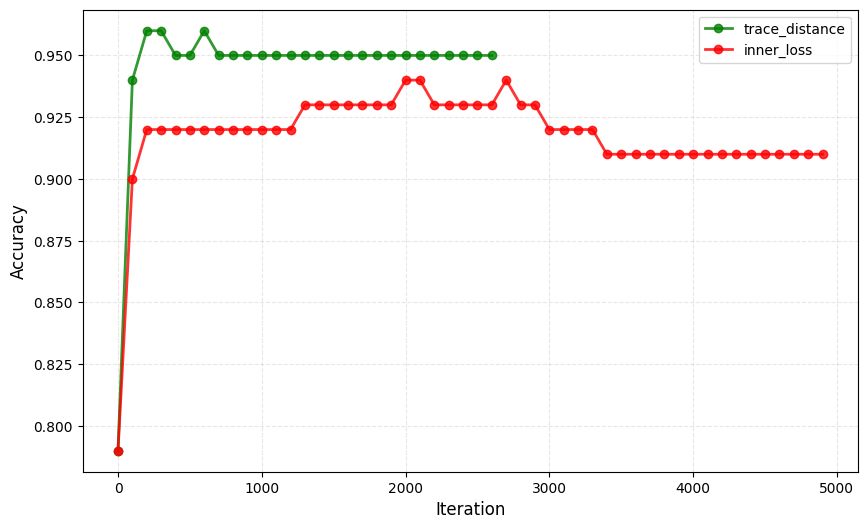

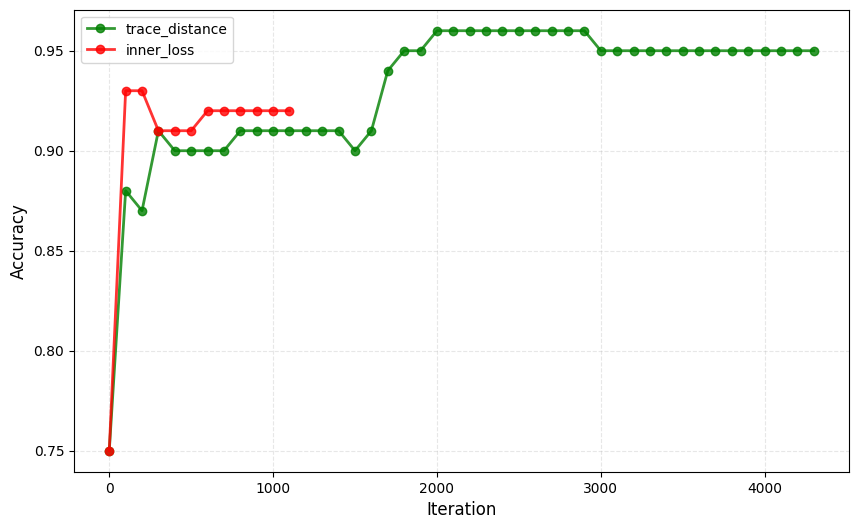

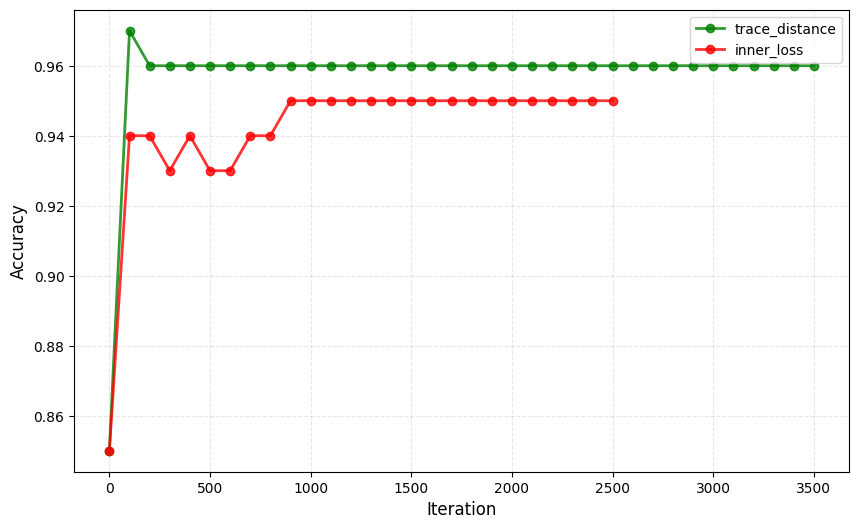

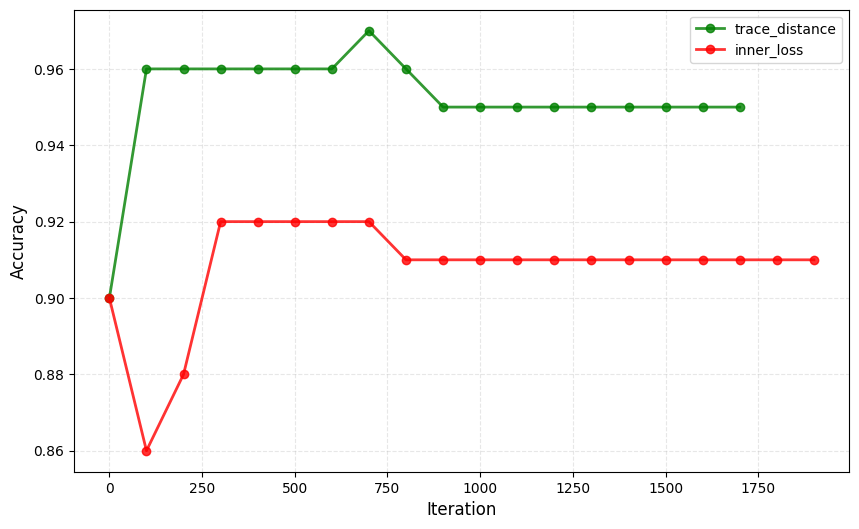

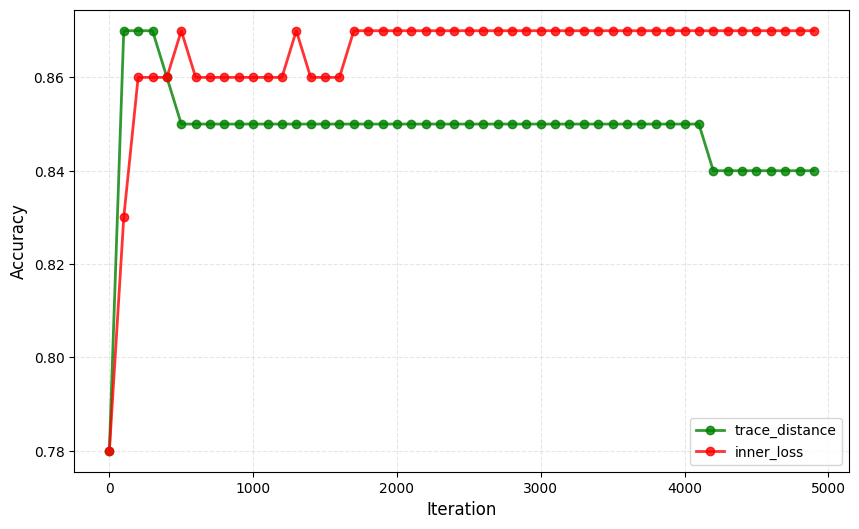

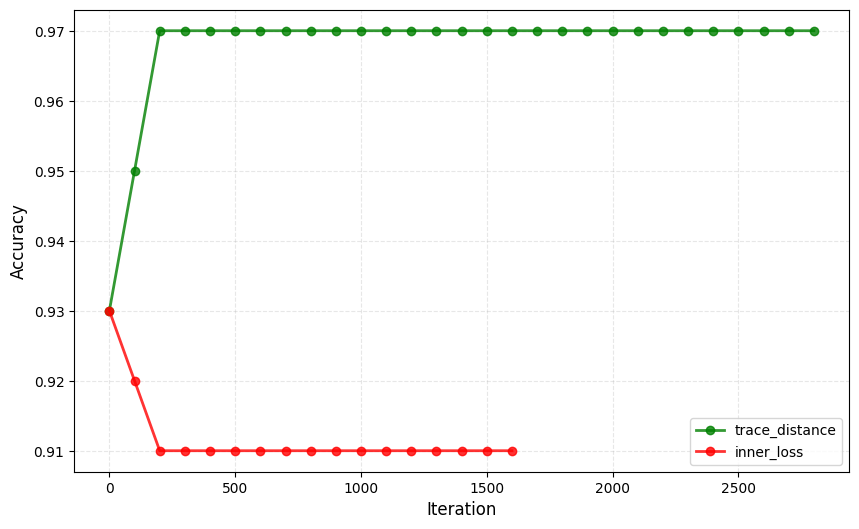

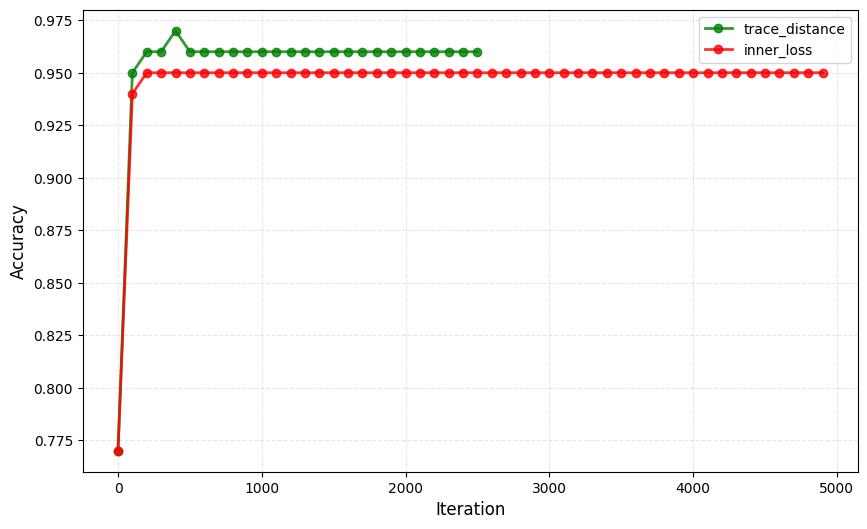

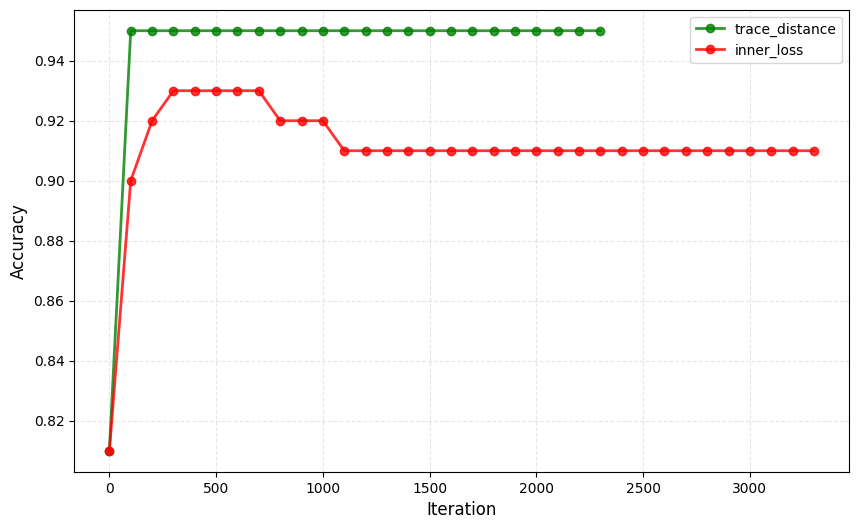

In [3]:
import matplotlib.pyplot as plt

for i in range(num_runs):
	tqfm_trace = data['trace_distance'][i]
	tqfm_inner = data['inner_loss'][i]
	# Plot SVC accuracy
	plt.figure(figsize=(10, 6))
	plt.plot(tqfm_trace.accuracy_iteration_indices, tqfm_trace.train_accuracy_history, 
				marker='o', linestyle='-', linewidth=2, markersize=6,
				color='green', label='trace_distance', alpha=0.8)
	
	# plt.plot(tqfm_trace.accuracy_iteration_indices, tqfm_trace.val_accuracy_history, 
	# 			marker='s', linestyle='--', linewidth=2, markersize=6,
	# 			color='green', label='Validation', alpha=0.8)
	
	plt.plot(tqfm_inner.accuracy_iteration_indices, tqfm_inner.train_accuracy_history, 
				marker='o', linestyle='-', linewidth=2, markersize=6,
				color='red', label='inner_loss', alpha=0.8)
	
	# plt.plot(tqfm_inner.accuracy_iteration_indices, tqfm_inner.val_accuracy_history, 
	# 			marker='s', linestyle='--', linewidth=2, markersize=6,
	# 			color='red', label='inner_loss', alpha=0.8)

	

	plt.xlabel('Iteration', fontsize=12)
	plt.ylabel('Accuracy', fontsize=12)
	# plt.title('Classical SVC (kernel)', fontsize=14, fontweight='bold')
	plt.grid(True, alpha=0.3, linestyle='--')
	plt.legend(fontsize=10, loc='best')

In [4]:
from sklearn.datasets import make_moons
from src.kernel_estimate import KernelMatrix
from src.classifier import ClassicalClassifier

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

X_test1, y_test1 = make_moons(n_samples=200, noise=0.2, random_state=1)
X_test2, y_test2 = make_moons(n_samples=200, noise=0.2, random_state=2)
X_test3, y_test3 = make_moons(n_samples=200, noise=0.2, random_state=3)
X_test4, y_test4 = make_moons(n_samples=200, noise=0.2, random_state=4)
X_test5, y_test5 = make_moons(n_samples=200, noise=0.2, random_state=5)

mean_test_acc = {'trace_distance': [], 'inner_loss': []}

for i in range(num_runs):
	tqfm_trace = data['trace_distance'][i]
	tqfm_inner = data['inner_loss'][i]
	
	# Skip if parameters are None
	if tqfm_trace.best_params is None or tqfm_inner.best_params is None:
		print(f"Run {i+1}: Skipped (parameters are None)")
		continue
	
	kernel_train_trace = KernelMatrix.compute_kernel_matrix_with_inner_products(X, X, tqfm_trace.best_params, tqfm_trace.circuit)
	kernel_trace1 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test1, X, tqfm_trace.best_params, tqfm_trace.circuit)
	kernel_trace2 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test2, X, tqfm_trace.best_params, tqfm_trace.circuit)
	kernel_trace3 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test3, X, tqfm_trace.best_params, tqfm_trace.circuit)
	kernel_trace4 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test4, X, tqfm_trace.best_params, tqfm_trace.circuit)
	kernel_trace5 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test5, X, tqfm_trace.best_params, tqfm_trace.circuit)

	kernel_train_inner = KernelMatrix.compute_kernel_matrix_with_inner_products(X, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner1 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test1, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner2 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test2, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner3 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test3, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner4 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test4, X, tqfm_inner.best_params, tqfm_inner.circuit)
	kernel_inner5 = KernelMatrix.compute_kernel_matrix_with_inner_products(X_test5, X, tqfm_inner.best_params, tqfm_inner.circuit)

	train_acc_trace1, test_acc_trace1, model, _ = ClassicalClassifier.evaluate_model(kernel_train_trace, kernel_trace1, y, y_test1)
	train_acc_trace2, test_acc_trace2, model, _ = ClassicalClassifier.evaluate_model(kernel_train_trace, kernel_trace2, y, y_test2)
	train_acc_trace3, test_acc_trace3, model, _ = ClassicalClassifier.evaluate_model(kernel_train_trace, kernel_trace3, y, y_test3)
	train_acc_trace4, test_acc_trace4, model, _ = ClassicalClassifier.evaluate_model(kernel_train_trace, kernel_trace4, y, y_test4)
	train_acc_trace5, test_acc_trace5, model, _ = ClassicalClassifier.evaluate_model(kernel_train_trace, kernel_trace5, y, y_test5)

	train_acc_inner1, test_acc_inner1, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner1, y, y_test1)
	train_acc_inner2, test_acc_inner2, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner2, y, y_test2)
	train_acc_inner3, test_acc_inner3, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner3, y, y_test3)
	train_acc_inner4, test_acc_inner4, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner4, y, y_test4)
	train_acc_inner5, test_acc_inner5, model, _ = ClassicalClassifier.evaluate_model(kernel_train_inner, kernel_inner5, y, y_test5)

	print(f"Run {i+1}:")
	mean_test_acc_trace = np.mean([test_acc_trace1, test_acc_trace2, test_acc_trace3, test_acc_trace4, test_acc_trace5])
	mean_test_acc_inner = np.mean([test_acc_inner1, test_acc_inner2, test_acc_inner3, test_acc_inner4, test_acc_inner5])

	print(f"  Trace Distance - Mean Test Accuracy: {mean_test_acc_trace*100:.2f}%")
	print(f"  Inner Loss     - Mean Test Accuracy: {mean_test_acc_inner*100:.2f}%")

	mean_test_acc['trace_distance'].append(mean_test_acc_trace)
	mean_test_acc['inner_loss'].append(mean_test_acc_inner)

# Overall statistics
print("\n" + "="*70)
print("OVERALL STATISTICS")
print("="*70)
for loss_name in loss_names:
	if mean_test_acc[loss_name]:
		overall_mean = np.mean(mean_test_acc[loss_name])
		overall_std = np.std(mean_test_acc[loss_name])
		print(f"{loss_name} - Mean Test Accuracy: {overall_mean*100:.2f}% ± {overall_std*100:.2f}% (n={len(mean_test_acc[loss_name])} runs)")
	else:
		print(f"{loss_name} - No valid runs")

Run 1:
  Trace Distance - Mean Test Accuracy: 96.90%
  Inner Loss     - Mean Test Accuracy: 93.50%
Run 2:
  Trace Distance - Mean Test Accuracy: 96.20%
  Inner Loss     - Mean Test Accuracy: 94.80%
Run 3:
  Trace Distance - Mean Test Accuracy: 96.00%
  Inner Loss     - Mean Test Accuracy: 94.30%
Run 4:
  Trace Distance - Mean Test Accuracy: 96.50%
  Inner Loss     - Mean Test Accuracy: 89.30%
Run 5:
  Trace Distance - Mean Test Accuracy: 96.90%
  Inner Loss     - Mean Test Accuracy: 90.20%
Run 6:
  Trace Distance - Mean Test Accuracy: 95.30%
  Inner Loss     - Mean Test Accuracy: 90.70%
Run 7:
  Trace Distance - Mean Test Accuracy: 96.80%
  Inner Loss     - Mean Test Accuracy: 89.80%
Run 8:
  Trace Distance - Mean Test Accuracy: 96.00%
  Inner Loss     - Mean Test Accuracy: 94.30%
Run 9:
  Trace Distance - Mean Test Accuracy: 96.70%
  Inner Loss     - Mean Test Accuracy: 94.80%
Run 10:
  Trace Distance - Mean Test Accuracy: 96.60%
  Inner Loss     - Mean Test Accuracy: 87.20%
Run 11:
 

In [5]:
from sklearn.metrics.pairwise import rbf_kernel
from src.classifier import ClassicalClassifier

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

X_test1, y_test1 = make_moons(n_samples=200, noise=0.2, random_state=1)
X_test2, y_test2 = make_moons(n_samples=200, noise=0.2, random_state=2)
X_test3, y_test3 = make_moons(n_samples=200, noise=0.2, random_state=3)
X_test4, y_test4 = make_moons(n_samples=200, noise=0.2, random_state=4)
X_test5, y_test5 = make_moons(n_samples=200, noise=0.2, random_state=5)

rbf_K_train = rbf_kernel(X, X)
rbf_K_test1 = rbf_kernel(X_test1, X)
rbf_K_test2 = rbf_kernel(X_test2, X)
rbf_K_test3 = rbf_kernel(X_test3, X)
rbf_K_test4 = rbf_kernel(X_test4, X)
rbf_K_test5 = rbf_kernel(X_test5, X)

train_acc, test_acc1, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test1, y, y_test1)
train_acc, test_acc2, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test2, y, y_test2)
train_acc, test_acc3, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test3, y, y_test3)
train_acc, test_acc4, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test4, y, y_test4)
train_acc, test_acc5, model, best_c = ClassicalClassifier.evaluate_model(rbf_K_train, rbf_K_test5, y, y_test5)

rbf_mean_test_acc = np.mean([test_acc1, test_acc2, test_acc3, test_acc4, test_acc5])
print(f"RBF Kernel - Mean Test Accuracy: {rbf_mean_test_acc*100:.2f}%")

RBF Kernel - Mean Test Accuracy: 96.40%


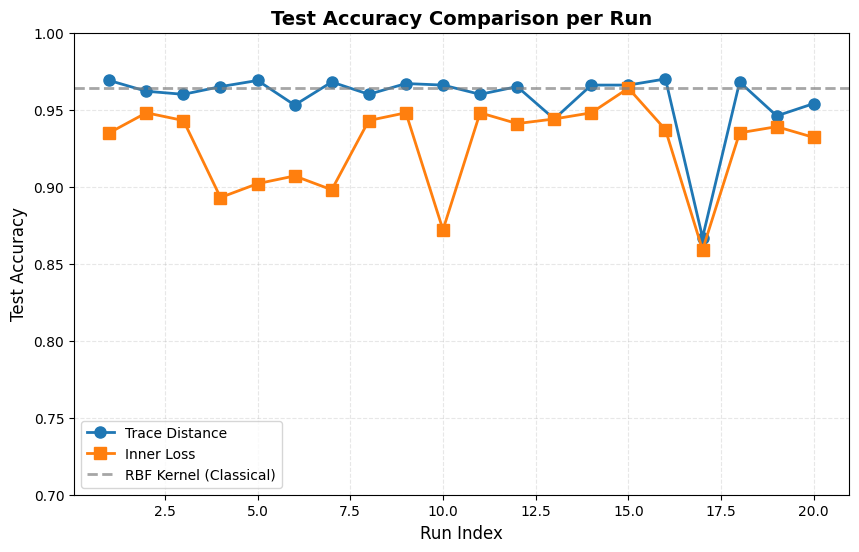

In [6]:
# Classical RBF kernel baseline (already computed in cell 6)
rbf_mean_test_acc = 0.964  # From cell 6 output

# Plot accuracy comparison including RBF baseline
plt.figure(figsize=(10, 6))
x_indices = range(1, len(mean_test_acc['trace_distance']) + 1)
plt.plot(x_indices, mean_test_acc['trace_distance'], marker='o', label='Trace Distance', linewidth=2, markersize=8)
plt.plot(x_indices, mean_test_acc['inner_loss'], marker='s', label='Inner Loss', linewidth=2, markersize=8)
plt.axhline(y=rbf_mean_test_acc, color='gray', linestyle='--', linewidth=2, label='RBF Kernel (Classical)', alpha=0.7)
plt.xlabel('Run Index', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy Comparison per Run', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, loc='best')
plt.ylim([0.7, 1])
plt.show()

In [7]:
import importlib

import src.classifier
importlib.reload(src.classifier)

<module 'src.classifier' from 'd:\\QuantumComputing\\SVQSVM1\\src\\classifier.py'>

In [8]:
from sklearn.datasets import make_moons
from src.classifier import QuantumClassifier

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

X_test1, y_test1 = make_moons(n_samples=200, noise=0.2, random_state=1)
X_test2, y_test2 = make_moons(n_samples=200, noise=0.2, random_state=2)
X_test3, y_test3 = make_moons(n_samples=200, noise=0.2, random_state=3)
X_test4, y_test4 = make_moons(n_samples=200, noise=0.2, random_state=4)
X_test5, y_test5 = make_moons(n_samples=200, noise=0.2, random_state=5)

mean_test_acc = {'trace_distance': [], 'inner_loss': []}

for i in range(num_runs):
	tqfm_trace = data['trace_distance'][i]
	tqfm_inner = data['inner_loss'][i]
	
	# Skip if parameters are None
	if tqfm_trace.best_params is None or tqfm_inner.best_params is None:
		print(f"Run {i+1}: Skipped (parameters are None)")
		continue

	qclf_trace = QuantumClassifier()
	qclf_trace.fit(tqfm_trace.best_rhos_qc_trace, tqfm_trace.circuit, tqfm_trace.best_params_qc_trace)
	test_acc_trace1 = qclf_trace.score(X_test1, y_test1, metric='trace_distance')
	test_acc_trace2 = qclf_trace.score(X_test2, y_test2, metric='trace_distance')
	test_acc_trace3 = qclf_trace.score(X_test3, y_test3, metric='trace_distance')
	test_acc_trace4 = qclf_trace.score(X_test4, y_test4, metric='trace_distance')
	test_acc_trace5 = qclf_trace.score(X_test5, y_test5, metric='trace_distance')
	qclf_inner = QuantumClassifier()
	qclf_inner.fit(tqfm_inner.best_rhos_qc_trace, tqfm_inner.circuit, tqfm_inner.best_params_qc_trace)
	test_acc_inner1 = qclf_inner.score(X_test1, y_test1, metric='trace_distance')
	test_acc_inner2 = qclf_inner.score(X_test2, y_test2, metric='trace_distance')
	test_acc_inner3 = qclf_inner.score(X_test3, y_test3, metric='trace_distance')
	test_acc_inner4 = qclf_inner.score(X_test4, y_test4, metric='trace_distance')
	test_acc_inner5 = qclf_inner.score(X_test5, y_test5, metric='trace_distance')

	print(f"Run {i+1}:")
	mean_test_acc_trace = np.mean([test_acc_trace1, test_acc_trace2, test_acc_trace3, test_acc_trace4, test_acc_trace5])
	mean_test_acc_inner = np.mean([test_acc_inner1, test_acc_inner2, test_acc_inner3, test_acc_inner4, test_acc_inner5])

	print(f"  Trace Distance - Mean Test Accuracy: {mean_test_acc_trace*100:.2f}%")
	print(f"  Inner Loss     - Mean Test Accuracy: {mean_test_acc_inner*100:.2f}%")

	mean_test_acc['trace_distance'].append(mean_test_acc_trace)
	mean_test_acc['inner_loss'].append(mean_test_acc_inner)

# Overall statistics
print("\n" + "="*70)
print("OVERALL STATISTICS")
print("="*70)
for loss_name in loss_names:
	if mean_test_acc[loss_name]:
		overall_mean = np.mean(mean_test_acc[loss_name])
		overall_std = np.std(mean_test_acc[loss_name])
		print(f"{loss_name} - Mean Test Accuracy: {overall_mean*100:.2f}% ± {overall_std*100:.2f}% (n={len(mean_test_acc[loss_name])} runs)")
	else:
		print(f"{loss_name} - No valid runs")

Run 1:
  Trace Distance - Mean Test Accuracy: 96.00%
  Inner Loss     - Mean Test Accuracy: 93.80%
Run 2:
  Trace Distance - Mean Test Accuracy: 96.60%
  Inner Loss     - Mean Test Accuracy: 94.80%
Run 3:
  Trace Distance - Mean Test Accuracy: 96.50%
  Inner Loss     - Mean Test Accuracy: 94.10%
Run 4:
  Trace Distance - Mean Test Accuracy: 93.90%
  Inner Loss     - Mean Test Accuracy: 86.10%
Run 5:
  Trace Distance - Mean Test Accuracy: 94.60%
  Inner Loss     - Mean Test Accuracy: 86.00%
Run 6:
  Trace Distance - Mean Test Accuracy: 96.70%
  Inner Loss     - Mean Test Accuracy: 86.10%
Run 7:
  Trace Distance - Mean Test Accuracy: 96.30%
  Inner Loss     - Mean Test Accuracy: 89.40%
Run 8:
  Trace Distance - Mean Test Accuracy: 96.70%
  Inner Loss     - Mean Test Accuracy: 86.70%
Run 9:
  Trace Distance - Mean Test Accuracy: 96.20%
  Inner Loss     - Mean Test Accuracy: 94.80%
Run 10:
  Trace Distance - Mean Test Accuracy: 94.20%
  Inner Loss     - Mean Test Accuracy: 89.10%
Run 11:
 

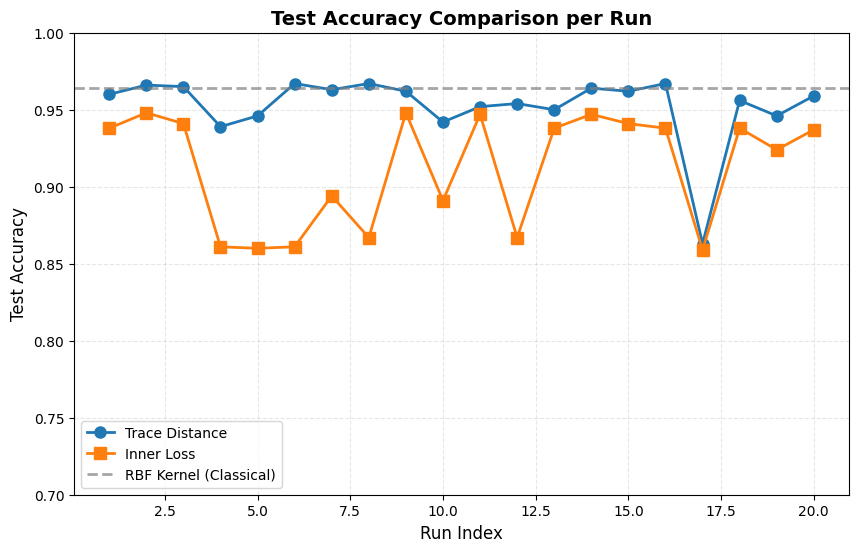

In [9]:
# Classical RBF kernel baseline (already computed in cell 6)
rbf_mean_test_acc = 0.964  # From cell 6 output

# Plot accuracy comparison including RBF baseline
plt.figure(figsize=(10, 6))
x_indices = range(1, len(mean_test_acc['trace_distance']) + 1)
plt.plot(x_indices, mean_test_acc['trace_distance'], marker='o', label='Trace Distance', linewidth=2, markersize=8)
plt.plot(x_indices, mean_test_acc['inner_loss'], marker='s', label='Inner Loss', linewidth=2, markersize=8)
plt.axhline(y=rbf_mean_test_acc, color='gray', linestyle='--', linewidth=2, label='RBF Kernel (Classical)', alpha=0.7)
plt.xlabel('Run Index', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy Comparison per Run', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=10, loc='best')
plt.ylim([0.7, 1])
plt.show()

# 2. Stable

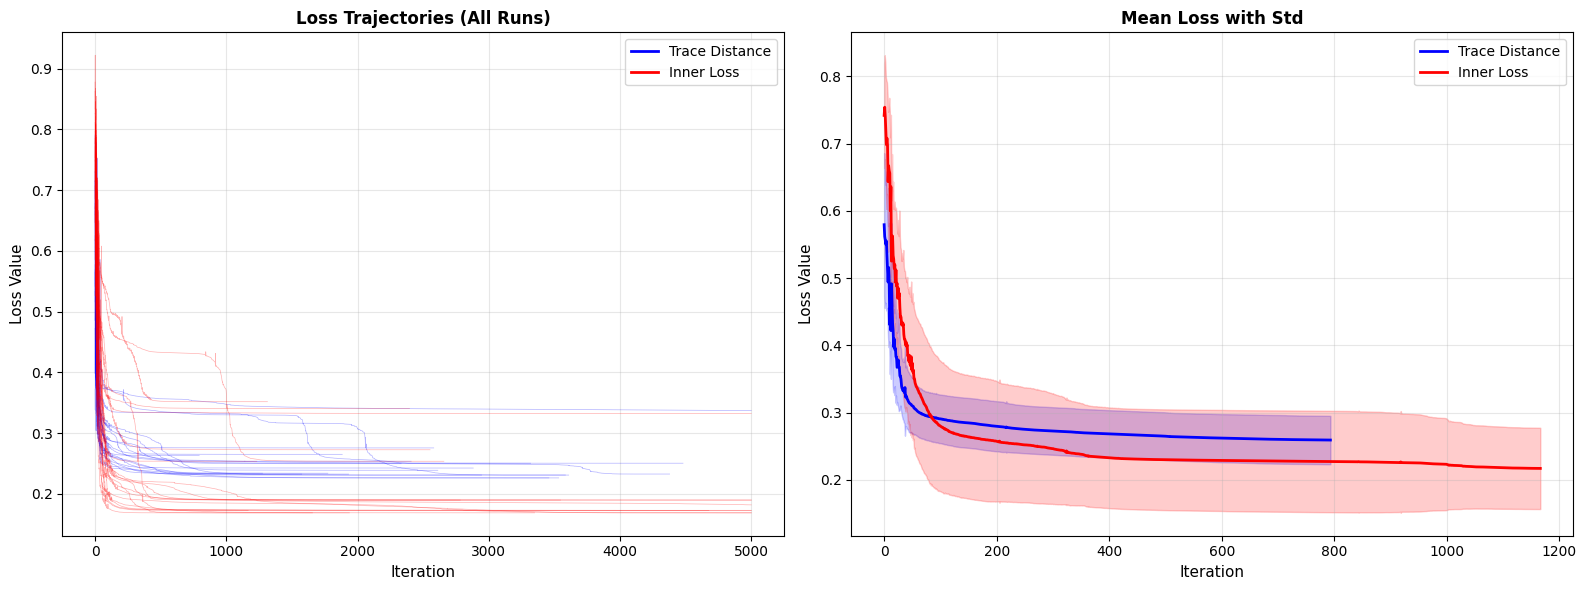

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_colors = {'trace_distance': 'blue', 'inner_loss': 'red'}

# First subplot: Loss Trajectories (All Runs)
ax = axes[0]
for loss_name in loss_names:
	runs = data[loss_name]
	for run in runs:
		ax.plot(run.loss_history, alpha=0.3, color=plot_colors[loss_name], linewidth=0.5)
ax.set_xlabel('Iteration', fontsize=11)
ax.set_ylabel('Loss Value', fontsize=11)
ax.set_title('Loss Trajectories (All Runs)', fontsize=12, fontweight='bold')
ax.legend([plt.Line2D([0], [0], color=plot_colors[ln], lw=2) for ln in loss_names], 
		 [ln.replace('_', ' ').title() for ln in loss_names])
# ax.set_xlim([0, 5000])
ax.grid(True, alpha=0.3)

# Second subplot: Mean Loss with Std
ax = axes[1]
for loss_name in loss_names:
	runs = data[loss_name]
	max_len = min([len(run.loss_history) for run in runs])
	trajectories = np.array([run.loss_history[:max_len] for run in runs])
	mean_traj = np.mean(trajectories, axis=0)
	std_traj = np.std(trajectories, axis=0)
	
	ax.plot(mean_traj, color=plot_colors[loss_name], linewidth=2, 
			label=loss_name.replace('_', ' ').title())
	ax.fill_between(range(len(mean_traj)), 
				   mean_traj - std_traj, 
				   mean_traj + std_traj, 
				   color=plot_colors[loss_name], alpha=0.2)

ax.set_xlabel('Iteration', fontsize=11)
ax.set_ylabel('Loss Value', fontsize=11)
ax.set_title('Mean Loss with Std', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



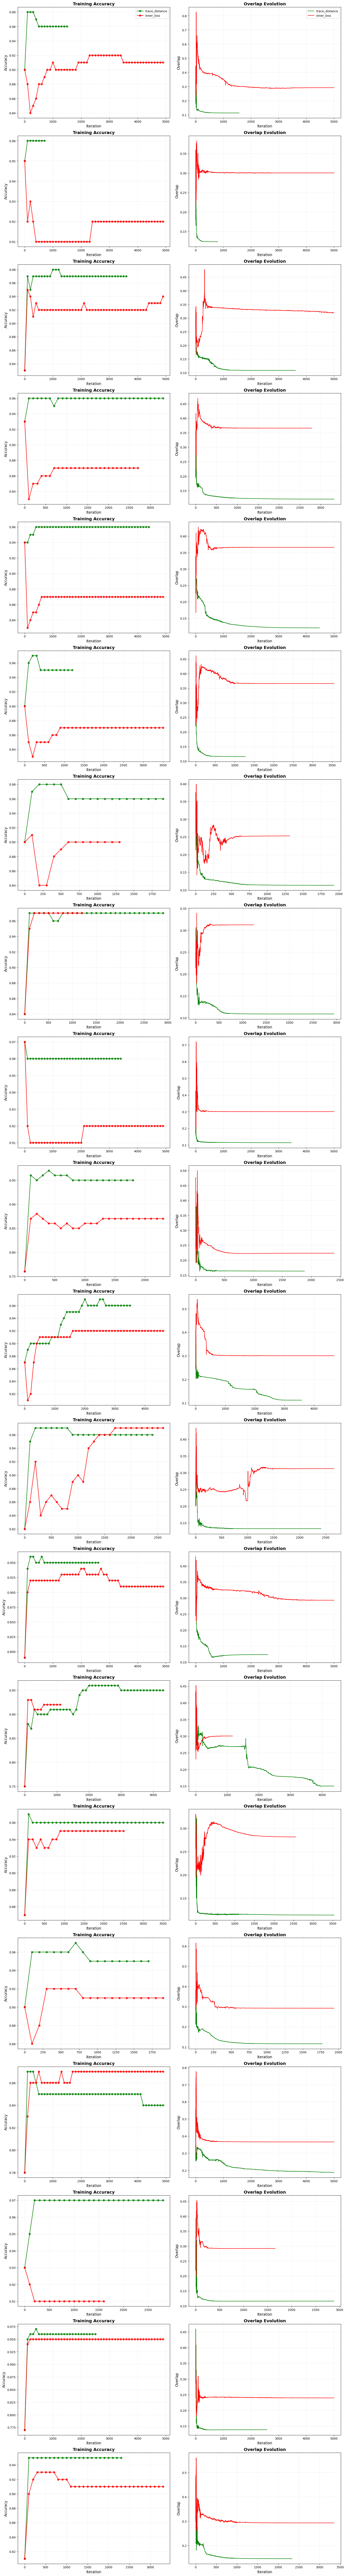

In [14]:
fig, axes = plt.subplots(num_runs, 2, figsize=(16, 6*num_runs), constrained_layout=True)

for i in range(num_runs):
	tqfm_trace = data['trace_distance'][i]
	# tqfm_hs = data['hilbert_schmidt'][i]
	tqfm_inner = data['inner_loss'][i]

	# Plot 1: Accuracy
	ax = axes[i][0]
	ax.plot(tqfm_trace.accuracy_iteration_indices, tqfm_trace.train_accuracy_history, 
			marker='o', linestyle='-', linewidth=2, markersize=6,
			color='green', label='trace_distance' if i == 0 else '', alpha=0.8)
	
	ax.plot(tqfm_inner.accuracy_iteration_indices, tqfm_inner.train_accuracy_history, 
			marker='o', linestyle='-', linewidth=2, markersize=6,
			color='red', label='inner_loss' if i == 0 else '', alpha=0.8)
	
	ax.set_xlabel('Iteration', fontsize=12)
	ax.set_ylabel('Accuracy', fontsize=12)
	ax.set_title('Training Accuracy', fontsize=14, fontweight='bold')
	ax.grid(True, alpha=0.3, linestyle='--')
	if i == 0:
		ax.legend(fontsize=10, loc='best')

	# Plot 2: Distance
	ax = axes[i][1]
	ax.plot(tqfm_trace.cross_ovl, color='green', label='trace_distance' if i == 0 else '')
	ax.plot(tqfm_inner.cross_ovl, color='red', label='inner_loss' if i == 0 else '')
	
	ax.set_xlabel('Iteration', fontsize=12)
	ax.set_ylabel('Overlap', fontsize=12)
	ax.set_title('Overlap Evolution', fontsize=14, fontweight='bold')
	ax.grid(True, alpha=0.3, linestyle='--')
	if i == 0:
		ax.legend(fontsize=10, loc='best')

plt.show()